# Advanced Certification in AIML
## A Program by IIIT-H and TalentSprint

## Problem Statement

To improve the classification performance of the Fashion MNIST images

## Learning Objectives

At the end of the experiment, you will be able to :

* Understand the Feature extraction
* Know how PCA affects the classification accuracy
* Train the classifier with PCA
* Classify using MLP with different parameters

In [2]:
#@title Mini Hackathon Walkthrough Video
from IPython.display import HTML

HTML("""<video width="500" height="300" controls>
  <source src="https://cdn.talentsprint.com/aiml/aiml_2020_b14_hyd/experiment_details_backup/ImageClassification_Improveperformance.mp4" type="video/mp4">
</video>
""")

## Dataset

### History
The original MNIST dataset contains handwritten digits. People from AI/ML or the Data Science community love this dataset. They use it as a benchmark to validate their algorithms. In fact, MNIST is often the first dataset they would try on. As per popular belief, If the algorithm doesn’t work on MNIST, it won’t work at all. Well, if the algorithm works on MNIST, it may still fail on other datasets.


As per the recent [paper](https://www.ijrte.org/wp-content/uploads/papers/v8i2/B3092078219.pdf) describing about Fashion-MNIST, It is a dataset recomposed from the product pictures of Zalando’s websites. Fashion-MNIST is intended to serve as a direct drop-in replacement for the original MNIST dataset for benchmarking machine learning algorithms, as it shares the same image size, data format and the structure of training and testing splits.

There are some good reasons for the challenges faced by MNIST dataset:

* MNIST is too easy - Neural networks can achieve 99.7% on MNIST easily, and similarly, even classic ML algorithms can achieve 97%. 

* MNIST is overused - Almost everyone who has experience with deep learning has come across MNIST at least once.

* MNIST cannot represent modern CV task


### Description

The dataset chosen for this experiment is Fashion-MNIST. The dataset is made up of 28x28 grayscale images of 70,000 fashion products from 10 categories, with 7,000 images per category. The training set has 60,000 images and the test set has 10,000 images. 

Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255.

**Labels / Classes**

0 - T-shirt/top

1 - Trouser

2 - Pullover

3 - Dress

4 - Coat

5 - Sandal

6 - Shirt

7 - Sneaker

8 - Bag

9 - Ankle boot

## Grading = 20 Marks

## Setup Steps

In [3]:
#@title Please enter your registration id to start: { run: "auto", display-mode: "form" }
Id = "2002038" #@param {type:"string"}


In [4]:
#@title Please enter your password (normally your phone number) to continue: { run: "auto", display-mode: "form" }
password = "7901457965" #@param {type:"string"}


In [5]:
#@title Run this cell to complete the setup for this Notebook
from IPython import get_ipython

ipython = get_ipython()
  
notebook= "M2_Mini_Hackathon1_ImageClassification_ImprovePerformance" #name of the notebook

def setup():
#  ipython.magic("sx pip3 install torch")  
    from IPython.display import HTML, display
    ipython.magic("sx wget https://cdn.talentsprint.com/aiml/Mini-Hackathon/fashion.zip")
    ipython.magic("sx unzip fashion.zip")
    #ipython.magic("sx wget https://cdn.talentsprint.com/aiml/Experiment_related_data/fashion-mnist_test.csv")
    display(HTML('<script src="https://dashboard.talentsprint.com/aiml/record_ip.html?traineeId={0}&recordId={1}"></script>'.format(getId(),submission_id)))
    print("Setup completed successfully")
    return


def submit_notebook():
    
    import requests, json, base64, datetime

    url = "https://dashboard.talentsprint.com/xp/app/save_notebook_attempts"
    if not submission_id:
      data = {"id" : getId(), "notebook" : notebook, "mobile" : getPassword()}
      r = requests.post(url, data = data)
      r = json.loads(r.text)

      if r["status"] == "Success":
          return r["record_id"]
      elif "err" in r:        
        print(r["err"])
        return None        
      else:
        print ("Something is wrong, the notebook will not be submitted for grading")
        return None
    
    elif getAnswer() and getComplexity() and getAdditional() and getConcepts() and getWalkthrough() and getComments() and getInclassSupport() and getOnlineSupport():
      f = open(notebook + ".ipynb", "rb")
      file_hash = base64.b64encode(f.read())

      data = {"complexity" : Complexity, "additional" :Additional, 
              "concepts" : Concepts, "record_id" : submission_id, 
              "answer" : Answer, "id" : Id, "file_hash" : file_hash,
              "notebook" : notebook, "feedback_walkthrough":Walkthrough ,
              "feedback_experiments_input" : Comments,
              "feedback_inclass_mentor": Inclass_support,
              "feedback_online_mentor" : Online_support}

      r = requests.post(url, data = data)
      r = json.loads(r.text)
      if "err" in r:        
        print(r["err"])
        return None   
      else:
        print("Your submission is successful.")
        print("Ref Id:", submission_id)
        print("Date of submission: ", r["date"])
        print("Time of submission: ", r["time"])
        print("View your submissions: https://iiith-aiml.talentsprint.com/notebook_submissions")
        #print("For any queries/discrepancies, please connect with mentors through the chat icon in LMS dashboard.")
        return submission_id
    else: submission_id
    

def getAdditional():
  try:
    if not Additional: 
      raise NameError
    else:
      return Additional  
  except NameError:
    print ("Please answer Additional Question")
    return None

def getComplexity():
  try:
    if not Complexity:
      raise NameError
    else:
      return Complexity
  except NameError:
    print ("Please answer Complexity Question")
    return None
  
def getConcepts():
  try:
    if not Concepts:
      raise NameError
    else:
      return Concepts
  except NameError:
    print ("Please answer Concepts Question")
    return None
  
  
def getWalkthrough():
  try:
    if not Walkthrough:
      raise NameError
    else:
      return Walkthrough
  except NameError:
    print ("Please answer Walkthrough Question")
    return None
  
def getComments():
  try:
    if not Comments:
      raise NameError
    else:
      return Comments
  except NameError:
    print ("Please answer Comments Question")
    return None
  
def getInclassSupport():
  try:
    if not Inclass_support:
      raise NameError
    else:
      return Inclass_support
  except NameError:
    print ("Please answer Inclass support Question")
    return None
  
  
def getOnlineSupport():
  try:
    if not Online_support:
      raise NameError
    else:
      return Online_support
  except NameError:
    print ("Please answer Online support Question")
    return None

def getAnswer():
  try:
    if not Answer:
      raise NameError 
    else: 
      return Answer
  except NameError:
    print ("Please answer Question")
    return None
  

def getId():
  try: 
    return Id if Id else None
  except NameError:
    return None

def getPassword():
  try:
    return password if password else None
  except NameError:
    return None

submission_id = None
### Setup 
if getPassword() and getId():
  submission_id = submit_notebook()
  if submission_id:
    setup() 
else:
  print ("Please complete Id and Password cells before running setup")


Setup completed successfully


### Importing Required Packages

In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.decomposition import PCA
from sklearn.neural_network import MLPClassifier
import warnings
warnings.filterwarnings("ignore")
from datetime import datetime
from sklearn.externals import joblib 
import pytz

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## **Stage 1:** Classify with raw features

### 3 Marks -> Get the features and labels of Fashion MNIST train data

1. Extract the features of the images

   Hint: [Link](https://www.analyticsvidhya.com/blog/2019/08/3-techniques-extract-features-from-image-data-machine-learning-python/)

2. Convert the features to numpy array

3. Normalize the features

3. Convert the categorical value to the numerical

5. Plot the first 5 images



In [7]:
df = pd.read_csv('/content/fashion/index_train.csv')
Images = list(df['image'])
categories = list(df['category'])

In [8]:
# YOUR CODE HERE
# For extracting the pixel values of all the images
from skimage.io import imread, imshow

features = []

for path in Images:
    image = imread('fashion/' + path, as_gray=True)
    features.append(image.ravel())

In [9]:
# YOUR CODE HERE
# For converting to numpy array
features = np.asarray(features)

In [10]:
# YOUR CODE HERE
# For normalizing the features
from sklearn.preprocessing import normalize, LabelEncoder
features = normalize(features)
# array1 = normalize(features,axis=1)

In [11]:
# YOUR CODE HERE
# For getting the numerical labels
# le = LabelEncoder()
# labels = le.fit_transform(categories)
cat_dict = {'Ankle boot': 9,'Bag': 8, 'Coat': 4, 'Dress': 3, 'Pullover': 2,\
            'Sandal': 5, 'Shirt': 6, 'Sneaker': 7, 'T-shirt': 0, 'Trouser': 1}
labels = [cat_dict[category] for category in categories]
labels = np.asarray(labels)

In [12]:
features.shape, labels.shape

((50000, 784), (50000,))

In [13]:
joblib.dump(features, 'features.pkl')
joblib.dump(labels,'labels.pkl')

['labels.pkl']

In [14]:
features_ss = []
labels_ss = []
for i in range(10):
  for j in range(10000):
    if labels[j] == i:
      features_ss.append(features[j])
      labels_ss.append(labels[j])
      if len(features_ss) / (i + 1) == 100:
        break

In [15]:
features_ss = np.array(features_ss)
labels_ss = np.array(labels_ss)

Bag


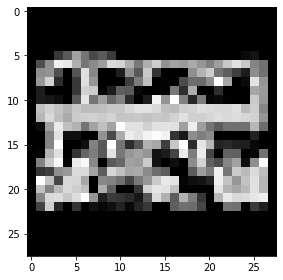

Sneaker


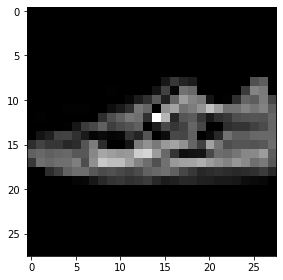

Shirt


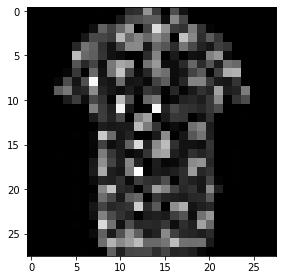

Bag


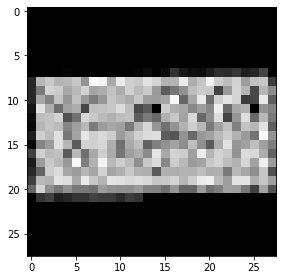

Sneaker


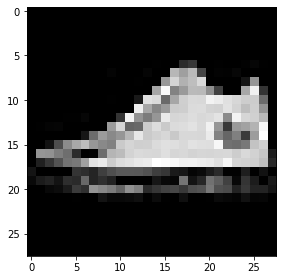

In [16]:
# YOUR CODE HERE
# For plotting first 5 images
for i in range(5):
  image = imread('fashion/' + Images[i], as_gray=True)
  print(categories[i])
  imshow(image)
  plt.show()

### 3 Marks -> Train the MLP classifier on raw features

1. Split the data

2. Train the MLP classifier with different parameters

3. Get the accuracy score

In [17]:
# YOUR CODE HERE
#split the train features in train and validation sets
X_train, X_val, y_train, y_val =  train_test_split(features, labels, test_size=0.2, random_state=18)
X_train.shape, X_val.shape, y_train.shape, y_val.shape


((40000, 784), (10000, 784), (40000,), (10000,))

In [27]:
#function to Create MLP classifier object with hyper parameters
def mlp(a,s,h,lr,miter):
    clf = MLPClassifier(activation= a ,solver= s ,hidden_layer_sizes = h,max_iter = miter \
                        ,random_state=2000\
                        ,alpha=0.0001,learning_rate = 'constant',learning_rate_init=lr)
    return clf 
#function to calculate the accuracy
def accuracy(actual,predicted):
    return accuracy_score(actual,predicted)

# Activation functions 
activation = ["identity","logistic","tanh","relu"]
#solvers: The following are the methods by which your weights get updated.
solvers = ["lbfgs","adam"]
#learning rate
learning_rate = [0.0001,0.001,0.01,0.1]
#hidden layers
hidden_layers = [(500),(400),(400,200),(500,300)]
lr_type = ['constant', 'invscaling']

In [19]:
# %tensorflow_version 2.x
# import tensorflow as tf
# device_name = tf.test.gpu_device_name()
# if device_name != '/device:GPU:0':
#   raise SystemError('GPU device not found')
# print('Found GPU at: {}'.format(device_name))

In [20]:
X_train.shape, y_train.shape, X_val.shape, y_val.shape

((40000, 784), (40000,), (10000, 784), (10000,))

In [ ]:
# acc_list = []
for miter in range(1,200,5):  
# miter = 100
  start_time = datetime.now(pytz.timezone('Asia/Kolkata'))
  print(start_time.time(),end='  ')
  clf = mlp('relu','adam',(64),0.001,miter)
  #batch size 512, alpha = 0.0001

  #Fitting the data into model
  clf.fit(X_train,y_train)

  ## Predicting the values on trained model using train data
  y_pred = clf.predict(X_val)

  #Calculating the train accuracy
  mlp_accuracy = accuracy(y_val,y_pred)
  # acc_list.append(mlp_accuracy)

  time_taken = datetime.now(pytz.timezone('Asia/Kolkata')) - start_time
  print(f'Accuracy: {mlp_accuracy} epochs: {miter}',end=' ')
  print(f'Time elapsed: {time_taken}')

23:04:13.811257  Accuracy: 0.752 epochs: 1 Time elapsed: 0:00:01.085346
23:04:14.896858  Accuracy: 0.8448 epochs: 6 Time elapsed: 0:00:05.911870
23:04:20.809368  Accuracy: 0.8565 epochs: 11 Time elapsed: 0:00:10.805562
23:04:31.615186  Accuracy: 0.866 epochs: 16 Time elapsed: 0:00:15.730596
23:04:47.346547  Accuracy: 0.8695 epochs: 21 Time elapsed: 0:00:20.587899
23:05:07.935741  Accuracy: 0.8684 epochs: 26 Time elapsed: 0:00:25.483647
23:05:33.420064  Accuracy: 0.8762 epochs: 31 Time elapsed: 0:00:30.274041
23:06:03.694845  Accuracy: 0.8772 epochs: 36 Time elapsed: 0:00:35.272485
23:06:38.968017  Accuracy: 0.8817 epochs: 41 Time elapsed: 0:00:40.136511
23:07:19.105301  Accuracy: 0.8792 epochs: 46 Time elapsed: 0:00:45.054676
23:08:04.160776  Accuracy: 0.8834 epochs: 51 Time elapsed: 0:00:49.739871
23:08:53.901308  Accuracy: 0.886 epochs: 56 Time elapsed: 0:00:54.769992
23:09:48.672031  Accuracy: 0.8846 epochs: 61 Time elapsed: 0:00:59.742839
23:10:48.415603  Accuracy: 0.8862 epochs: 6

In [22]:
# acc_list = []
for miter in range(1,202,3):  
  start_time = datetime.now(pytz.timezone('Asia/Kolkata'))
  print(start_time.time(),end='  ')
  clf = mlp('relu','adam',(256,64),0.001,miter)
  #batch size 512, alpha = 0.0001

  #Fitting the data into model
  clf.fit(X_train,y_train)

  ## Predicting the values on trained model using train data
  y_pred = clf.predict(X_val)

  #Calculating the train accuracy
  mlp_accuracy = accuracy(y_val,y_pred)
  # acc_list.append(mlp_accuracy)

  time_taken = datetime.now(pytz.timezone('Asia/Kolkata')) - start_time
  print(f'Accuracy: {mlp_accuracy} epochs: {miter}',end=' ')
  print(f'Time elapsed: {time_taken}')

16:14:09.519730  Accuracy: 0.7747 epochs: 1 Time elapsed: 0:00:02.300290
16:14:11.820754  Accuracy: 0.8346 epochs: 4 Time elapsed: 0:00:08.392505
16:14:20.213695  Accuracy: 0.8489 epochs: 7 Time elapsed: 0:00:14.433060
16:14:34.647121  Accuracy: 0.8662 epochs: 10 Time elapsed: 0:00:20.780296
16:14:55.427693  Accuracy: 0.872 epochs: 13 Time elapsed: 0:00:26.840165
16:15:22.268503  Accuracy: 0.8769 epochs: 16 Time elapsed: 0:00:33.032836
16:15:55.301974  Accuracy: 0.8815 epochs: 19 Time elapsed: 0:00:39.590628
16:16:34.892887  Accuracy: 0.884 epochs: 22 Time elapsed: 0:00:45.684978
16:17:20.578548  Accuracy: 0.8781 epochs: 25 Time elapsed: 0:00:51.882664
16:18:12.461968  Accuracy: 0.8826 epochs: 28 Time elapsed: 0:00:58.319046
16:19:10.781270  Accuracy: 0.8844 epochs: 31 Time elapsed: 0:01:04.473071
16:20:15.254619  Accuracy: 0.8863 epochs: 34 Time elapsed: 0:01:10.729795
16:21:25.984708  Accuracy: 0.8794 epochs: 37 Time elapsed: 0:01:17.127671
16:22:43.113319  Accuracy: 0.8851 epochs: 4

In [ ]:
start_time = datetime.now(pytz.timezone('Asia/Kolkata'))
print(start_time.time())
clf = mlp('relu','adam',(256),0.001,'constant')
#batch size 512, max iter = 140

#Fitting the data into model
clf.fit(X_train,y_train)

## Predicting the values on trained model using train data
y_pred = clf.predict(X_val)

#Calculating the train accuracy
mlp_accuracy = accuracy(y_val,y_pred)

time_taken = datetime.now(pytz.timezone('Asia/Kolkata')) - start_time
print(f'Accuracy: {mlp_accuracy}',end=' ')
print(f'Time elapsed: {time_taken}')

17:10:17.338765
Accuracy: 0.8943 Time elapsed: 0:04:57.847224


## **Stage 2:** Classify with PCA features

Principal component analysis can be used to reduce the dimensions of an image and project back the data from the reduced space to reconstruct the image

### 1 Mark -> Plot the explained variance ratio

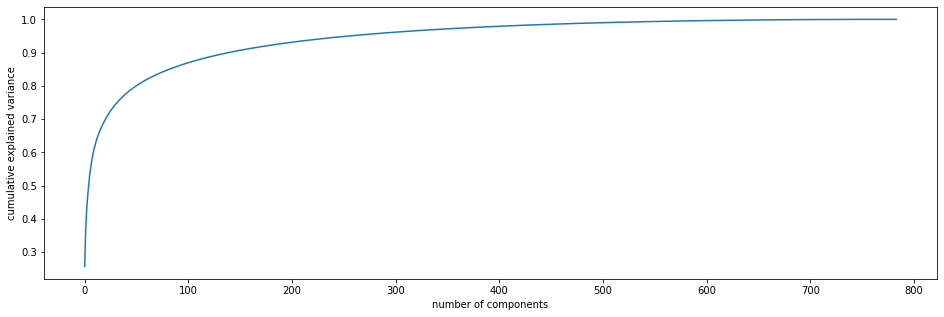

In [ ]:
# YOUR CODE HERE
pca = PCA().fit(features)
plt.figure(figsize=(16,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [ ]:
np.cumsum(pca.explained_variance_ratio_)[3]

0.4761021638903038

### 2 Marks -> Apply PCA on normalized features with different components

In [ ]:
# YOUR CODE HERE
pca = PCA(n_components=3)
trans_data = pca.fit_transform(features)
# type(trans_data)

In [ ]:
trans_data.shape

(50000, 3)

### 2 Marks -> Train the MLP classifier with PCA features

1. Train the MLP classifier with different parameters

2. Get the accuracy score

In [ ]:
# YOUR CODE HERE
#split the train features in train and validation sets
X_train, X_val, y_train, y_val =  train_test_split(trans_data, labels, test_size=0.2, random_state=18)
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((40000, 3), (10000, 3), (40000,), (10000,))

In [ ]:
start_time = datetime.now(pytz.timezone('Asia/Kolkata'))
print(start_time)
clf_pca = mlp('relu','adam',(200),0.01,'constant')

#Fitting the data into model
clf_pca.fit(X_train,y_train)

## Predicting the values on trained model using train data
y_pred = clf_pca.predict(X_val)

#Calculating the train accuracy
mlp_accuracy = accuracy(y_val,y_pred)

time_taken = datetime.now(pytz.timezone('Asia/Kolkata')) - start_time
print(f'Accuracy: {mlp_accuracy}',end=' ')
print(f'Time elapsed: {time_taken}')

2020-06-20 16:55:02.120600+05:30
Accuracy: 0.6605 Time elapsed: 0:00:26.220865


In [ ]:
start_time = datetime.now()
print(start_time)
clf_pca = mlp('relu','adam',(160,100),0.01,'constant')

#Fitting the data into model
clf_pca.fit(X_train,y_train)

## Predicting the values on trained model using train data
y_pred = clf_pca.predict(X_val)

#Calculating the train accuracy
mlp_accuracy = accuracy(y_val,y_pred)

time_taken = datetime.now() - start_time
print(f'Accuracy: {mlp_accuracy}',end=' ')
print(f'Time elapsed: {time_taken}')

2020-06-18 11:03:02.037375
Accuracy: 0.8773 Time elapsed: 0:08:21.564709


## **Stage 3:**Test Evaluation

### Expected performance of test evaluation is above 90%

### 4 Marks -> Evaluate model with the given test data

1.  Extract the features of the test data

2. Convert the Categorical value into numericals as given for the train data 

2.  Pass through the model and verify the accuracy

In [ ]:
df_test = pd.read_csv('/content/fashion/index_test.csv')
Images = list(df_test['image'])
categories = list(df_test['category'])

In [ ]:
len(Images), len(categories)

(10000, 10000)

In [ ]:
# YOUR CODE HERE for getting the features of the test data.
Test_features =[] #Do not change the name as it is used for the mentors evaluation
for path in Images:
    image = imread('fashion/' + path, as_gray=True)
    Test_features.append(image.ravel())
Test_features = np.array(Test_features)
Test_features = normalize(Test_features)

In [ ]:
# YOUR CODE HERE for getting the numerical labels as defined in train data
Test_labels=[] #Do not change the name as it is used for the mentors evaluation
Test_labels = [cat_dict[category] for category in categories]
Test_labels = np.asarray(Test_labels)

In [ ]:
test_data = pca.fit_transform(Test_features)

In [ ]:
test_data.shape

(10000, 300)

In [ ]:
Test_features.shape, Test_labels.shape

((10000, 784), (10000,))

In [ ]:
# Give the model name 
# predicted_values = clf_pca.predict(test_data)
predicted_values = clf.predict(Test_features)
accuracy_score(predicted_values,Test_labels)

0.8921

## **Stage 4:** Report Analysis

### 5 Marks -> Provide your observations on the following:

1. Mention all the steps you have followed 

2. Explain each step which worked well to improve the accuracy 

3. Explain each step which did not work well to improve the accuracy 

In [ ]:
# YOUR TEXT HERE
# 1.  Extracted features and normalized them
#     split the features,labels into train, validation sets using a test size of 0.2
#     Tried various combinations of activation, learning rate, hidden layers and nodes.
#     Did classification using MLPClassifier with one hidden layer (400 nodes), relu activation and a learning rate of 0.01
#     Achieved accuracy of 89%
#     Tried using different values for alpha and tol. Alpha of 0.001 gave good accuracy

# 2.  One hidden layer with 400 nodes (half of input nodes)
#     The optimizer Adam has good accuracy rate
#     alpha of 0.001
#     Relu activation function

# 3.  sgd optimizer 
#     identity did not give good accuracy
#     learning rate of 0.1 and 0.0001